## Copyright (C) 2020 Sobhan Moradiyan Daghigh - All Rights Reserved
#### 12/27/2020
## ID3 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

#### Hiii. As u know, always the first thing before starting a project, is a mental image of it :) 

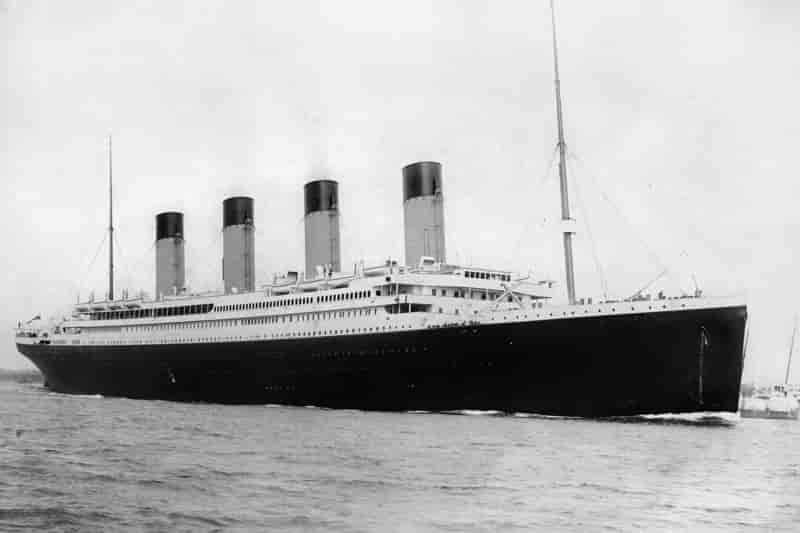

In [2]:
Image.open('titanic.jpg')   

### Reading datasets 

In [3]:
train = pd.DataFrame(pd.read_csv('./datasets/train.csv'))
test  = pd.DataFrame(pd.read_csv('./datasets/test.csv'))

In [4]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,484,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134.0,9.5875,NaN,S,1
1,276,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502.0,77.9583,D7,S,1
2,223,3,"Green, Mr. George Henry",male,51.0,0,0,21440.0,8.0500,NaN,S,0
3,632,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743.0,7.0542,NaN,S,0
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077.0,31.3875,NaN,S,1


In [5]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Survived
count,800.000000,800.000000,640.000000,800.000000,800.000000,5.890000e+02,800.000000,800.0000
mean,447.867500,2.311250,29.632031,0.541250,0.387500,2.649668e+05,32.592395,0.3850
std,258.858126,0.835312,14.617948,1.139044,0.811275,4.819212e+05,50.726982,0.4869
min,1.000000,1.000000,0.670000,0.000000,0.000000,6.950000e+02,0.000000,0.0000
25%,224.750000,2.000000,20.000000,0.000000,0.000000,2.416000e+04,7.925000,0.0000
50%,449.500000,3.000000,28.000000,0.000000,0.000000,2.361710e+05,14.500000,0.0000
75%,677.250000,3.000000,38.000000,1.000000,0.000000,3.477430e+05,31.275000,1.0000
max,891.000000,3.000000,80.000000,8.000000,6.000000,3.101298e+06,512.329200,1.0000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Pclass       800 non-null    int64  
 2   Name         800 non-null    object 
 3   Sex          800 non-null    object 
 4   Age          640 non-null    float64
 5   SibSp        800 non-null    int64  
 6   Parch        800 non-null    int64  
 7   Ticket       589 non-null    float64
 8   Fare         800 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     800 non-null    object 
 11  Survived     800 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 75.1+ KB


#### Therefore, it seems that (Age, Ticket, Cabin) columns have missing values.

### Ok now make a preprocess on attrs and make them useful

#### Usefull attrs: { 'Pclass' - 'Sex' - 'Age' - 'Cabin' - 'Embarked' }

### In order to have a good estimation of missing ages, lets group by the datas like this and then estimate the values of each group missing ages

In [7]:
group = train.groupby(by=['Sex', 'Pclass', 'Survived'])
group.first()

PassengerId  \
Sex    Pclass Survived                
female 1      0                 499   
              1                 276   
       2      0                 855   
              1                 547   
       3      0                 793   
              1                 484   
male   1      0                 263   
              1                 840   
       2      0                 818   
              1                 544   
       3      0                 223   
              1                 763   

                                                                   Name   Age  \
Sex    Pclass Survived                                                          
female 1      0         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0   
              1                       Andrews, Miss. Kornelia Theodosia  63.0   
       2      0           Carter, Mrs. Ernest Courtenay (Lilian Hughes)  44.0   
              1                       Beane, Mrs. Edward (Ethel Clarke)  19.0   
       3      0                                 Sage, Miss. Stella Anna  10.0   
              1                                  Turkula, Mrs. (Hedwig)  63.0   
male   1      0                                       Taussig, Mr. Emil  52.0   
              1                                    Marechal, Mr. Pierre  35.0   
       2      0                                      Mallet, Mr. Albert  31.0   
              1                                       Beane, Mr. Edward  32.0   
       3      0                                 Green, Mr. George Henry  51.0   
              1                                   Barah, Mr. Hanna Assi  20.0   

                        SibSp  Parch    Ticket      Fare    Cabin Embarked  
Sex    Pclass Survived                                                      
female 1      0             1      2  113781.0  151.5500  C22 C26        S  
              1             1      0   13502.0   77.9583       D7        S  
       2      0             1      0  244252.0   26.0000      E77        S  
              1             1      0    2908.0   26.0000     E101        S  
       3      0             8      2  345773.0   69.5500       G6        S  
              1             0      0    4134.0    9.5875     E121        S  
male   1      0             1      1  110413.0   79.6500      E67        S  
              1             0      0   11774.0   29.7000      C47        C  
       2      0             1      1  233866.0   37.0042        D        C  
              1             1      0    2908.0   26.0000       F2        S  
       3      0             0      0   21440.0    8.0500      F38        S  
              1             0      0    2663.0    7.2292     E121        C

#### Here we seperated datas into 12 groups, and now try to estimate the missed ages in each group

In [8]:
for grp, pdf in group:
    print("Sex: ", grp[0], "     Pclass: ", grp[1], "     Survived: ", grp[2],
          "     count: ", len(pdf), "     null_counts: ", pdf['Age'].isnull().sum(),
          "     avg: ", round(np.mean(pd.DataFrame(pdf['Age'].tolist()).dropna())[0]),
          "     median", np.median(pd.DataFrame(pdf['Age'].tolist()).dropna()))                

Sex:  female      Pclass:  1      Survived:  0      count:  3      null_counts:  0      avg:  26      median 25.0
Sex:  female      Pclass:  1      Survived:  1      count:  82      null_counts:  9      avg:  35      median 35.0
Sex:  female      Pclass:  2      Survived:  0      count:  5      null_counts:  0      avg:  38      median 38.0
Sex:  female      Pclass:  2      Survived:  1      count:  63      null_counts:  2      avg:  28      median 28.0
Sex:  female      Pclass:  3      Survived:  0      count:  63      null_counts:  15      avg:  23      median 21.5
Sex:  female      Pclass:  3      Survived:  1      count:  65      null_counts:  23      avg:  19      median 20.0
Sex:  male      Pclass:  1      Survived:  0      count:  69      null_counts:  13      avg:  44      median 45.5
Sex:  male      Pclass:  1      Survived:  1      count:  39      null_counts:  5      avg:  35      median 35.5
Sex:  male      Pclass:  2      Survived:  0      count:  81      null_counts:  7  

#### As u see, I calculate the avg and median for feature "Age" in each group. According to the results, I prefer to use median for fill in missing ages

In [9]:
for grp, pdf in group:
    median = np.median(pdf[pdf['Age'].notnull()]['Age'].tolist())
    nan_arr = pdf[pdf['Age'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        train.loc[train['PassengerId'] == nan, 'Age'] = median
        
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Pclass       800 non-null    int64  
 2   Name         800 non-null    object 
 3   Sex          800 non-null    object 
 4   Age          800 non-null    float64
 5   SibSp        800 non-null    int64  
 6   Parch        800 non-null    int64  
 7   Ticket       589 non-null    float64
 8   Fare         800 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     800 non-null    object 
 11  Survived     800 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 75.1+ KB


#### We did it :) The "Age" missing datas handled

### Now repeat it for "Age" missing values of test datasets

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       91 non-null     int64  
 2   Name         91 non-null     object 
 3   Sex          91 non-null     object 
 4   Age          74 non-null     float64
 5   SibSp        91 non-null     int64  
 6   Parch        91 non-null     int64  
 7   Ticket       72 non-null     float64
 8   Fare         91 non-null     float64
 9   Cabin        21 non-null     object 
 10  Embarked     91 non-null     object 
 11  Survived     91 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.7+ KB


In [11]:
group_test = test.groupby(by=['Sex', 'Pclass'])
group_test.first()

PassengerId                                     Name   Age  \
Sex    Pclass                                                               
female 1               797              Leader, Dr. Alice (Farnham)  49.0   
       2                59             West, Miss. Constance Mirium   5.0   
       3               831  Yasbeck, Mrs. Antoni (Selini Alexander)  15.0   
male   1               648      Simonius-Blumer, Col. Oberst Alfons  56.0   
       2                22                    Beesley, Mr. Lawrence  34.0   
       3               373               Beavan, Mr. William Thomas  19.0   

               SibSp  Parch    Ticket     Fare Cabin Embarked  Survived  
Sex    Pclass                                                            
female 1           0      0   17465.0  25.9292   D17        S         1  
       2           1      2  236852.0  27.7500     D        S         1  
       3           1      0    2659.0  14.4542  None        C         1  
male   1           0      0   13213.0  35.5000   A26        C         1  
       2           0      0  248698.0  13.0000   D56        S         1  
       3           0      0  323951.0   8.0500  None        S         0

In [12]:
for grp, pdf in group_test:
    print("Sex: ", grp[0], "     Pclass: ", grp[1], "     count: ", len(pdf), "     null_counts: ", pdf['Age'].isnull().sum(), "     avg: ", round(np.mean(pd.DataFrame(pdf['Age'].tolist()).dropna())[0]), "     median", np.median(pd.DataFrame(pdf['Age'].tolist()).dropna()))                

Sex:  female      Pclass:  1      count:  9      null_counts:  0      avg:  35      median 36.0
Sex:  female      Pclass:  2      count:  8      null_counts:  0      avg:  25      median 26.0
Sex:  female      Pclass:  3      count:  16      null_counts:  4      avg:  26      median 27.0
Sex:  male      Pclass:  1      count:  14      null_counts:  3      avg:  44      median 48.0
Sex:  male      Pclass:  2      count:  11      null_counts:  0      avg:  31      median 30.0
Sex:  male      Pclass:  3      count:  33      null_counts:  10      avg:  26      median 24.0


In [13]:
for grp, pdf in group_test:
    median = np.median(pdf[pdf['Age'].notnull()]['Age'].tolist())
    nan_arr = pdf[pdf['Age'].isnull()]['PassengerId'].tolist()
    for nan in nan_arr:
        test.loc[test['PassengerId'] == nan, 'Age'] = median
        
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       91 non-null     int64  
 2   Name         91 non-null     object 
 3   Sex          91 non-null     object 
 4   Age          91 non-null     float64
 5   SibSp        91 non-null     int64  
 6   Parch        91 non-null     int64  
 7   Ticket       72 non-null     float64
 8   Fare         91 non-null     float64
 9   Cabin        21 non-null     object 
 10  Embarked     91 non-null     object 
 11  Survived     91 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.7+ KB


### Ok now wanna convert the non-int attrs to integer for our ML. Because its better to have a rull in converting, I prefer to dont use the "LabelEncoder".

In [14]:
genders = {"female": 1, "male": 0}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,484,3,"Turkula, Mrs. (Hedwig)",1,63.0,0,0,4134.0,9.5875,NaN,S,1
1,276,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,13502.0,77.9583,D7,S,1
2,223,3,"Green, Mr. George Henry",0,51.0,0,0,21440.0,8.0500,NaN,S,0
3,632,3,"Lundahl, Mr. Johan Svensson",0,51.0,0,0,347743.0,7.0542,NaN,S,0
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,347077.0,31.3875,NaN,S,1


In [15]:
embarks = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarks)
    
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,484,3,"Turkula, Mrs. (Hedwig)",1,63.0,0,0,4134.0,9.5875,NaN,0,1
1,276,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,13502.0,77.9583,D7,0,1
2,223,3,"Green, Mr. George Henry",0,51.0,0,0,21440.0,8.0500,NaN,0,0
3,632,3,"Lundahl, Mr. Johan Svensson",0,51.0,0,0,347743.0,7.0542,NaN,0,0
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,347077.0,31.3875,NaN,0,1


### Here wanna categorize the "Age" attr two avoid overfitting

lenght of each group: 
59, 70, 302, 180, 85, 67, 25, 10, 2, 

<AxesSubplot:xlabel='Age'>

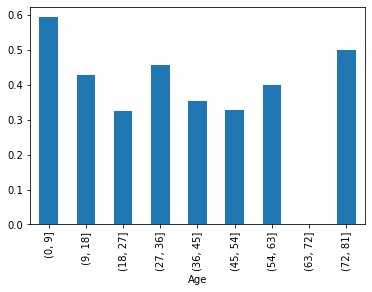

In [16]:
age_range = pd.cut(train["Age"], np.arange(0, 90, 9))
age_grps = train.groupby(age_range)
print("lenght of each group: ")
for grp, pdf in age_grps:
    print(len(pdf['Age'].tolist()), end=', ')

age_grps = age_grps.mean()
age_grps['Survived'].plot.bar()    

### So as u see in the above plot, I decided to seperate the groups sth like this: 
#### [0-9]
#### [9-18] + [27-36] + [54-63]
#### [18-27] + [36-45] + [45-54]
#### [63-72] + [72-81] 
##### --> The last segment is because of last 12 datas, which just one of them survived and that 0.5% bar is because of that person in the group with size of 2

In [17]:
ranges = {range(0, 9): 1, range(9, 18): 2, range(27, 36): 2, range(54, 63):2, range(18, 27): 3, range(36, 45): 3,
          range(45, 54): 3, range(63, 72): 4, range(72, 81): 4}

train['Age'] = train['Age'].apply(lambda x: next((v for k, v in ranges.items() if x in k), 0))
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,484,3,"Turkula, Mrs. (Hedwig)",1,4,0,0,4134.0,9.5875,NaN,0,1
1,276,1,"Andrews, Miss. Kornelia Theodosia",1,4,1,0,13502.0,77.9583,D7,0,1
2,223,3,"Green, Mr. George Henry",0,3,0,0,21440.0,8.0500,NaN,0,0
3,632,3,"Lundahl, Mr. Johan Svensson",0,3,0,0,347743.0,7.0542,NaN,0,0
4,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,3,1,5,347077.0,31.3875,NaN,0,1


### And do the same thing for test dataset

In [18]:
test['Age'] = test['Age'].apply(lambda x: next((v for k, v in ranges.items() if x in k), 0))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,373,3,"Beavan, Mr. William Thomas",0,3,0,0,323951.0,8.0500,NaN,0,0
1,22,2,"Beesley, Mr. Lawrence",0,2,0,0,248698.0,13.0000,D56,0,1
2,714,3,"Larsson, Mr. August Viktor",0,2,0,0,7545.0,9.4833,NaN,0,0
3,648,1,"Simonius-Blumer, Col. Oberst Alfons",0,2,0,0,13213.0,35.5000,A26,1,1
4,59,2,"West, Miss. Constance Mirium",1,1,1,2,NaN,27.7500,NaN,0,1


In [19]:
X_train = train.drop(["Survived", 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
Y_train = train["Survived"]
X_test  = test.drop(["Survived", 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1).copy()

In [20]:
tree = DecisionTreeClassifier(criterion='entropy',splitter='best')
tree.fit(X_train, Y_train)
Y_prediction = tree.predict(X_test)
ascending_tree = round(tree.score(X_train, Y_train) * 100, 2)
print("Train accuracy: ")
ascending_tree

Train accuracy: 


83.38

In [21]:
test['predicted_Survived'] = Y_prediction
test['outcome'] = np.where(test['Survived'] == test['predicted_Survived'], 'True', 'False')
true = test['outcome'].value_counts()['True']
false = test['outcome'].value_counts()['False']
print("Test accuracy: ")
round(np.multiply(np.divide(true, np.add(true, false)), 100), 2)

Test accuracy: 


80.22